<a href="https://colab.research.google.com/github/jajovp/Data-analyst-tutorials/blob/main/Analisis_exploratorio_muertes_por_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Muertes por contaminacion - Hoja 1.csv")
# To display the top 5 rows 
df.head(10)    

,index,cartodb_id,the_geom,Country Name,the_geom_webmercator,Country Code,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
0,0,1,NaN,Saudi Arabia,NaN,SAU,Saudi Arabia,79,725,18,45,18,140,131,1.0,119,1229
1,1,2,NaN,Romania,NaN,ROU,Romania,61,615,112,1,102,1,16,6746.0,11,2797884
2,2,3,NaN,Spain,NaN,ESP,Spain,69,6633,74,5,47,22,86,394.0,31,63707
3,3,4,NaN,Slovenia,NaN,SVN,Slovenia,135,1245,114,0,114,0,135,NaN,135,0
4,4,5,NaN,South Sudan,NaN,SSD,South Sudan,133,11733,114,0,114,0,120,21.0,122,508
5,5,6,NaN,Sierra Leone,NaN,SLE,Sierra Leone,102,885,42,16,68,10,124,11.0,131,114
6,6,7,NaN,South Africa,NaN,ZAF,South Africa,33,4567,84,3,51,19,24,4722.0,7,3427958
7,7,8,NaN,Republic of Serbia,NaN,SRB,Serbia,83,755,114,0,114,0,33,2794.0,45,272927
8,8,9,NaN,Slovakia,NaN,SVK,Slovak Republic,123,10533,97,2,102,1,115,46.0,106,7468
9,9,10,NaN,Solomon Islands,NaN,SLB,Solomon Islands,89,7683,39,17,102,1,80,445.0,121,511


In [3]:
df.tail(5) 


,index,cartodb_id,the_geom,Country Name,the_geom_webmercator,Country Code,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
177,177,178,NaN,Seychelles,NaN,SYC,Seychelles,135,1245,114,0,114,0,135,NaN,135,0
178,178,179,NaN,Gambia,NaN,GMB,Gambia,135,1245,114,0,114,0,135,NaN,135,0
179,179,180,NaN,Togo,NaN,TGO,Togo,131,11433,104,1,102,1,123,12.0,130,13
180,180,181,NaN,Trinidad and Tobago,NaN,TTO,Trinidad and Tobago,135,1245,114,0,114,0,135,NaN,135,0
181,181,182,NaN,Tonga,NaN,TON,Tonga,135,1245,114,0,114,0,135,NaN,135,0


In [4]:
df.dtypes

index                          int64
cartodb_id                     int64
the_geom                     float64
Country Name                  object
the_geom_webmercator         float64
Country Code                  object
country                       object
cri_rank                       int64
cri_score                      int64
fatalities_per_100k_rank       int64
fatalities_per_100k_total      int64
fatalities_rank                int64
fatalities_total               int64
losses_per_gdp__rank           int64
losses_per_gdp__total        float64
losses_usdm_ppp_rank           int64
losses_usdm_ppp_total          int64
dtype: object

In [5]:
df.columns

Index(['index', 'cartodb_id', 'the_geom', 'Country Name',
       'the_geom_webmercator', 'Country Code', 'country', 'cri_rank',
       'cri_score', 'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total'],
      dtype='object')

Calculamos y vemos los paises el puntaje (valor numérico) en términos de índice de riesgo de desastres.

In [6]:
# Ordenar el DataFrame por la columna "cri_score"
df_sorted = df.sort_values("cri_score")

In [7]:
# Seleccionar los primeros 10 registros del DataFrame ordenado
df_top10 = df_sorted.head(10)

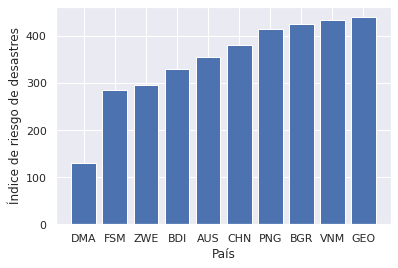

In [8]:
# Graficar los 10 primeros registros en un gráfico de barras
plt.bar(df_top10["Country Code"], df_top10["cri_score"])
plt.xlabel("País")
plt.ylabel("Índice de riesgo de desastres")
plt.show()

In [9]:
df = df.rename(columns={"Country Name": "paises", "country": "Pais", "losses_usdm_ppp_total": "perdida_en_mill_usd", "losses_usdm_ppp_rank": "perdida_usd_rank","fatalities_total": "total_muertes", "fatalities_rank": "muertes_rank", "cri_rank": "riesgo_de_desastres_rank" })
df.head(5)

,index,cartodb_id,the_geom,paises,the_geom_webmercator,Country Code,Pais,riesgo_de_desastres_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,muertes_rank,total_muertes,losses_per_gdp__rank,losses_per_gdp__total,perdida_usd_rank,perdida_en_mill_usd
0,0,1,NaN,Saudi Arabia,NaN,SAU,Saudi Arabia,79,725,18,45,18,140,131,1.0,119,1229
1,1,2,NaN,Romania,NaN,ROU,Romania,61,615,112,1,102,1,16,6746.0,11,2797884
2,2,3,NaN,Spain,NaN,ESP,Spain,69,6633,74,5,47,22,86,394.0,31,63707
3,3,4,NaN,Slovenia,NaN,SVN,Slovenia,135,1245,114,0,114,0,135,NaN,135,0
4,4,5,NaN,South Sudan,NaN,SSD,South Sudan,133,11733,114,0,114,0,120,21.0,122,508


In [10]:
df.shape

(182, 17)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [12]:
df.count() 

index                        182
cartodb_id                   182
the_geom                       0
paises                       179
the_geom_webmercator           0
Country Code                 179
Pais                         182
riesgo_de_desastres_rank     182
cri_score                    182
fatalities_per_100k_rank     182
fatalities_per_100k_total    182
muertes_rank                 182
total_muertes                182
losses_per_gdp__rank         182
losses_per_gdp__total        131
perdida_usd_rank             182
perdida_en_mill_usd          182
dtype: int64

In [13]:
df = df.drop_duplicates()
df.head(5)

,index,cartodb_id,the_geom,paises,the_geom_webmercator,Country Code,Pais,riesgo_de_desastres_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,muertes_rank,total_muertes,losses_per_gdp__rank,losses_per_gdp__total,perdida_usd_rank,perdida_en_mill_usd
0,0,1,NaN,Saudi Arabia,NaN,SAU,Saudi Arabia,79,725,18,45,18,140,131,1.0,119,1229
1,1,2,NaN,Romania,NaN,ROU,Romania,61,615,112,1,102,1,16,6746.0,11,2797884
2,2,3,NaN,Spain,NaN,ESP,Spain,69,6633,74,5,47,22,86,394.0,31,63707
3,3,4,NaN,Slovenia,NaN,SVN,Slovenia,135,1245,114,0,114,0,135,NaN,135,0
4,4,5,NaN,South Sudan,NaN,SSD,South Sudan,133,11733,114,0,114,0,120,21.0,122,508


In [14]:
df.count()

index                        182
cartodb_id                   182
the_geom                       0
paises                       179
the_geom_webmercator           0
Country Code                 179
Pais                         182
riesgo_de_desastres_rank     182
cri_score                    182
fatalities_per_100k_rank     182
fatalities_per_100k_total    182
muertes_rank                 182
total_muertes                182
losses_per_gdp__rank         182
losses_per_gdp__total        131
perdida_usd_rank             182
perdida_en_mill_usd          182
dtype: int64

In [15]:
df.head

<bound method NDFrame.head of      index  cartodb_id  the_geom               paises  the_geom_webmercator  \
0        0           1       NaN         Saudi Arabia                   NaN   
1        1           2       NaN              Romania                   NaN   
2        2           3       NaN                Spain                   NaN   
3        3           4       NaN             Slovenia                   NaN   
4        4           5       NaN          South Sudan                   NaN   
..     ...         ...       ...                  ...                   ...   
177    177         178       NaN           Seychelles                   NaN   
178    178         179       NaN               Gambia                   NaN   
179    179         180       NaN                 Togo                   NaN   
180    180         181       NaN  Trinidad and Tobago                   NaN   
181    181         182       NaN                Tonga                   NaN   

    Country Code     

In [16]:
df.shape

(182, 17)

<AxesSubplot:xlabel='fatalities_per_100k_total'>

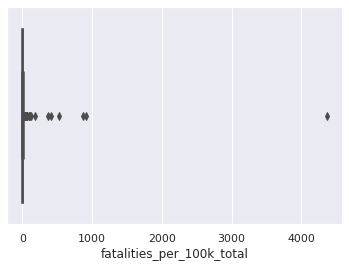

In [17]:
sns.boxplot(x=df['fatalities_per_100k_total'])

<AxesSubplot:xlabel='perdida_en_mill_usd'>

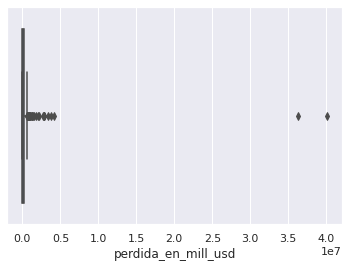

In [18]:
sns.boxplot(x=df['perdida_en_mill_usd'])

<AxesSubplot:xlabel='cri_score'>

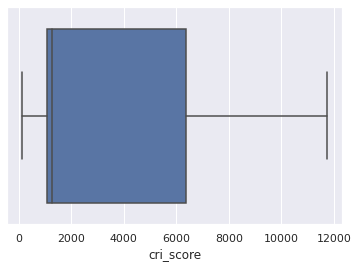

In [19]:
sns.boxplot(x=df['cri_score'])

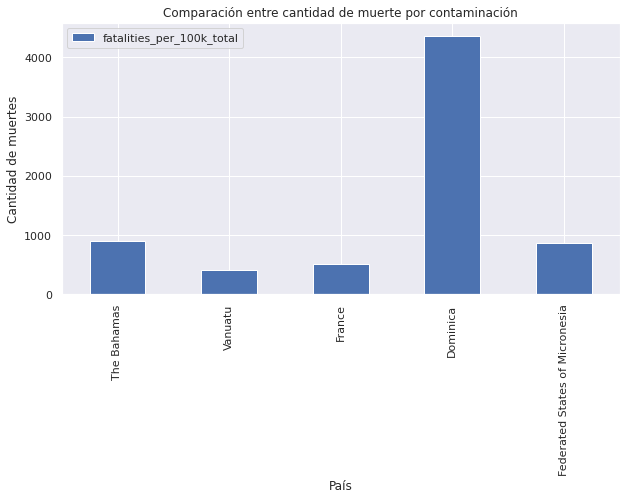

In [21]:
df_new = df.loc[:, ['paises', 'fatalities_per_100k_total', 'perdida_en_mill_usd']] 

top_5_paises = df_new.nlargest(5, 'fatalities_per_100k_total')['paises'].tolist()

df_top_5 = df_new.loc[df_new['paises'].isin(top_5_paises)]

df_top_5.plot(kind='bar', x='paises', y='fatalities_per_100k_total', figsize=(10,5))
plt.title("Comparación entre cantidad de muerte por contaminación")
plt.ylabel('Cantidad de muertes')
plt.xlabel('País');



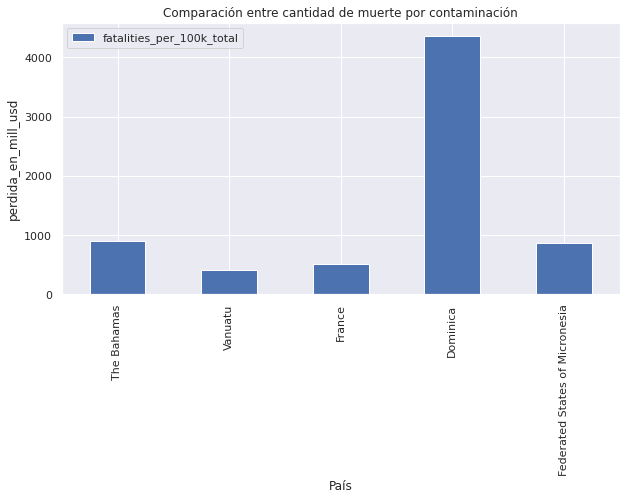

In [24]:
df_new = df.loc[:, ['paises', 'fatalities_per_100k_total', 'perdida_en_mill_usd']] 

top_5_paises = df_new.nlargest(5, 'fatalities_per_100k_total')['paises'].tolist()

df_top_5 = df_new.loc[df_new['paises'].isin(top_5_paises)]

df_top_5.plot(kind='bar', x='paises', y='fatalities_per_100k_total', figsize=(10,5))
plt.title("Comparación entre cantidad de muerte por contaminación")
plt.ylabel('perdida_en_mill_usd')
plt.xlabel('País');


,index,cartodb_id,the_geom,the_geom_webmercator,riesgo_de_desastres_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,muertes_rank,total_muertes,losses_per_gdp__rank,losses_per_gdp__total,perdida_usd_rank,perdida_en_mill_usd
index,1.000000,1.000000,NaN,NaN,0.074014,-0.093983,0.029394,0.051762,0.142634,-0.007657,0.051622,0.092524,0.179590,-0.052163
cartodb_id,1.000000,1.000000,NaN,NaN,0.074014,-0.093983,0.029394,0.051762,0.142634,-0.007657,0.051622,0.092524,0.179590,-0.052163
the_geom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the_geom_webmercator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
riesgo_de_desastres_rank,0.074014,0.074014,NaN,NaN,1.000000,0.045930,0.833210,-0.245399,0.797387,-0.299047,0.855257,-0.211357,0.814721,-0.244071
cri_score,-0.093983,-0.093983,NaN,NaN,0.045930,1.000000,0.086568,-0.098531,0.053587,-0.057652,-0.074096,-0.109509,-0.124446,-0.085845
fatalities_per_100k_rank,0.029394,0.029394,NaN,NaN,0.833210,0.086568,1.000000,-0.288364,0.832027,-0.295520,0.513768,-0.179298,0.438988,-0.116961
fatalities_per_100k_total,0.051762,0.051762,NaN,NaN,-0.245399,-0.098531,-0.288364,1.000000,-0.153353,0.067965,-0.211718,0.835055,-0.120790,-0.004492
muertes_rank,0.142634,0.142634,NaN,NaN,0.797387,0.053587,0.832027,-0.153353,1.000000,-0.377154,0.426958,-0.002992,0.612183,-0.266898
total_muertes,-0.007657,-0.007657,NaN,NaN,-0.299047,-0.057652,-0.295520,0.067965,-0.377154,1.000000,-0.135999,-0.029793,-0.270063,0.650476


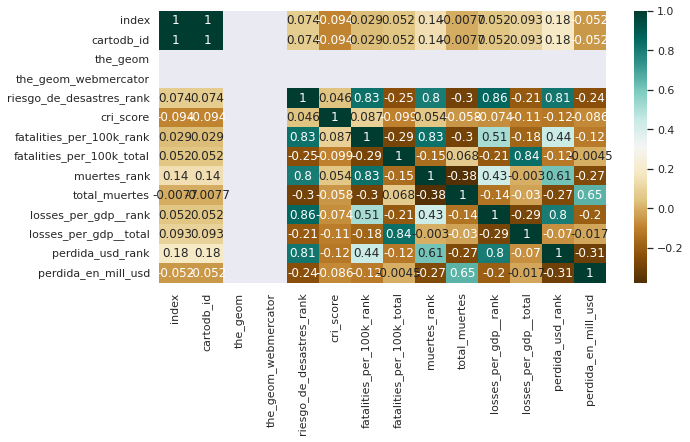

In [25]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

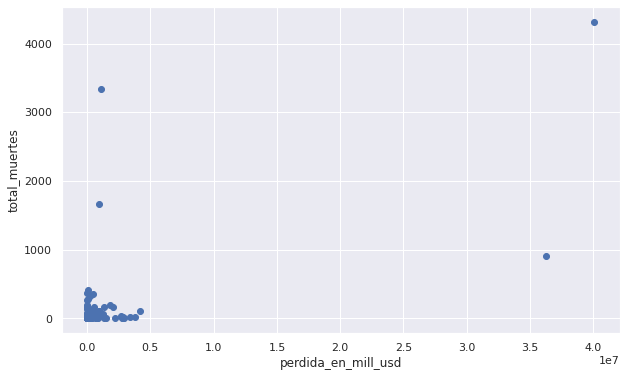

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['perdida_en_mill_usd'], df['total_muertes'])
ax.set_xlabel('perdida_en_mill_usd')
ax.set_ylabel('total_muertes')
plt.show()

Ordenamos y graficamos por cantidad total de muertes

In [19]:
# Ordena el DataFrame por la columna "fatalities_total" en orden ascendente
df_sorted = df.sort_values('fatalities_total')


In [20]:
# Selecciona los primeros 10 países de la tabla ordenada
top_10 = df_sorted.tail(10)

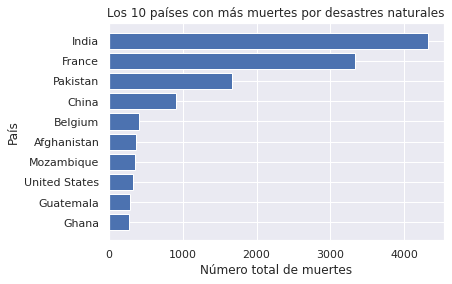

In [21]:
# Grafica los 10 países seleccionados en un gráfico vertical
plt.barh(top_10['country'], top_10['fatalities_total'])
plt.xlabel('Número total de muertes')
plt.ylabel('País')
plt.title('Los 10 países con más muertes por desastres naturales')
plt.show()

Creamos un df

In [54]:
# Crear DataFrame con los datos
data = {'Country Name': ['Mexico', 'China', 'Indonesia', 'India', 'Philippines',
                         'Iran, Islamic Rep.', 'Pakistan', 'Bangladesh', 'Nigeria', 'Vietnam'],
        'fatalities_total': [93877, 88794, 83969, 57832, 36877,
                             34505, 33371, 29108, 28011, 24426],
        'losses_per_gdp__total': [0.33, 0.27, 0.48, 0.05, 3.57,
                                  0.12, 0.46, 0.15, 0.05, 1.06]}
df = pd.DataFrame(data)

In [56]:
# Convertir la columna 'losses_per_gdp__total' de tipo float64 a int64
df['losses_per_gdp__total'] = df['losses_per_gdp__total'].astype('int64')

# Imprimir el DataFrame resultante
print(df)

         Country Name  fatalities_total  losses_per_gdp__total
0              Mexico             93877                      0
1               China             88794                      0
2           Indonesia             83969                      0
3               India             57832                      0
4         Philippines             36877                      3
5  Iran, Islamic Rep.             34505                      0
6            Pakistan             33371                      0
7          Bangladesh             29108                      0
8             Nigeria             28011                      0
9             Vietnam             24426                      1


In [62]:
# Crear DataFrame con los datos
data = {'Country Name': ['Mexico', 'China', 'Indonesia', 'India', 'Philippines',
                         'Iran, Islamic Rep.', 'Pakistan', 'Bangladesh', 'Nigeria', 'Vietnam'],
        'fatalities_total': [93877, 88794, 83969, 57832, 36877,
                             34505, 33371, 29108, 28011, 24426]}
df = pd.DataFrame(data)




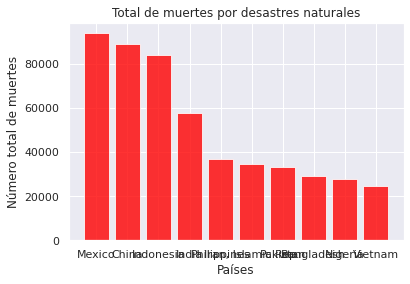

In [67]:
# Crear gráfico vertical
plt.bar(df['Country Name'], df['fatalities_total'], color='red', alpha=0.8)
# Agregar título y etiquetas de los ejes
plt.title('Total de muertes por desastres naturales')
plt.xlabel('Países')
plt.ylabel('Número total de muertes')
# Mostrar gráfico
plt.show()

In [15]:
print(df.isnull().sum())

index                          0
cartodb_id                     0
the_geom                     182
pais                           3
the_geom_webmercator         182
Country Code                   3
pais                           0
riesgo_de_desastres_rank       0
cri_score                      0
fatalities_per_100k_rank       0
fatalities_per_100k_total      0
muertes_rank                   0
total_muertes                  0
losses_per_gdp__rank           0
losses_per_gdp__total         51
perdida_usd_rank               0
perdida_en_mill_usd            0
dtype: int64


In [16]:
df = df.dropna()   
df.count()

index                        0
cartodb_id                   0
the_geom                     0
pais                         0
the_geom_webmercator         0
Country Code                 0
pais                         0
riesgo_de_desastres_rank     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
muertes_rank                 0
total_muertes                0
losses_per_gdp__rank         0
losses_per_gdp__total        0
perdida_usd_rank             0
perdida_en_mill_usd          0
dtype: int64

In [17]:
print(df.isnull().sum())

index                        0.0
cartodb_id                   0.0
the_geom                     0.0
pais                         0.0
the_geom_webmercator         0.0
Country Code                 0.0
pais                         0.0
riesgo_de_desastres_rank     0.0
cri_score                    0.0
fatalities_per_100k_rank     0.0
fatalities_per_100k_total    0.0
muertes_rank                 0.0
total_muertes                0.0
losses_per_gdp__rank         0.0
losses_per_gdp__total        0.0
perdida_usd_rank             0.0
perdida_en_mill_usd          0.0
dtype: float64
